<a href="https://colab.research.google.com/github/GaliHaritha123/Predictive-Maintenance-using-Multiclass-Classification-/blob/main/predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn lightgbm xgboost catboost seaborn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" an

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,plot_precision_recall_curve,precision_recall_curve,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer, StandardScaler)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [ ]:
df=pd.read_csv('predictive_maintenance.csv')

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
df.drop(['Product ID',"UDI","Target","Type"], axis=1, inplace=True)

In [ ]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,No Failure
9996,298.9,308.4,1632,31.8,17,No Failure
9997,299.0,308.6,1645,33.4,22,No Failure
9998,299.0,308.7,1408,48.5,25,No Failure


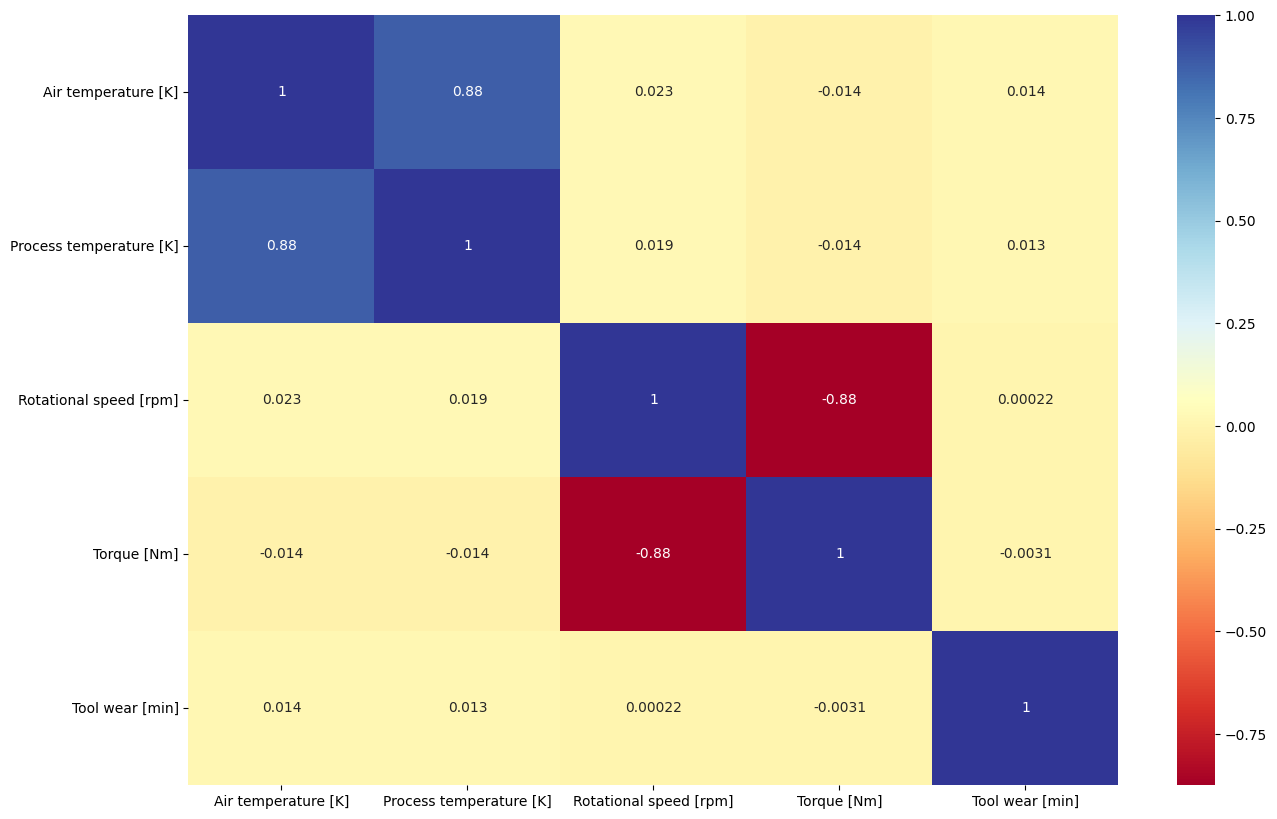

In [ ]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns

plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap="RdYlBu")
plt.draw()

In [ ]:
df.isnull().values.any()

False

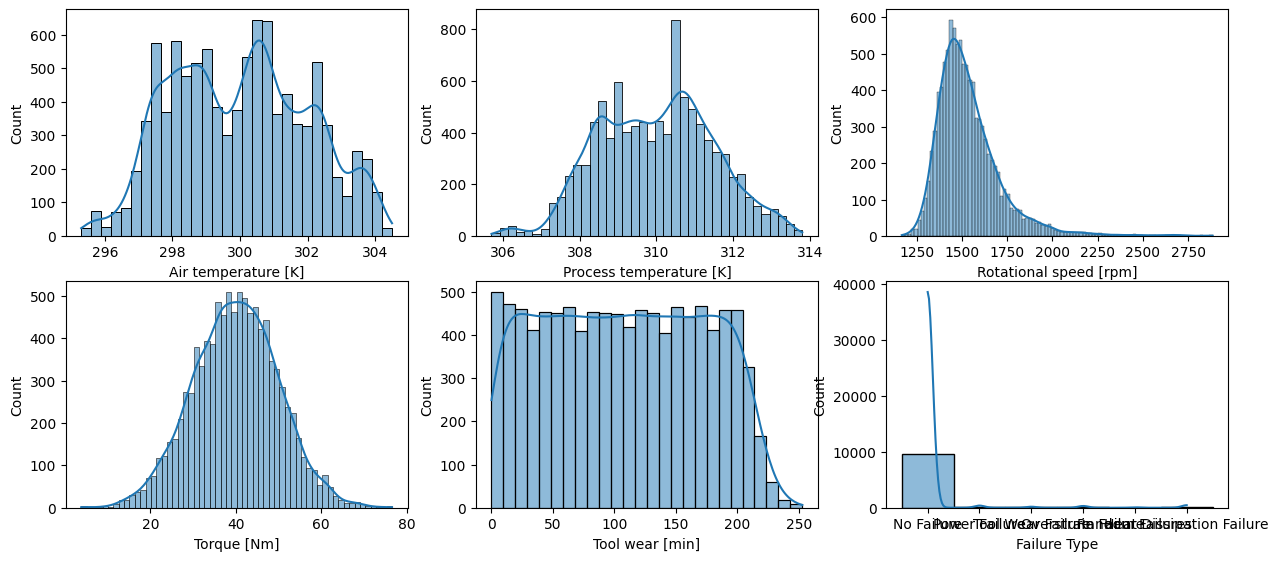

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

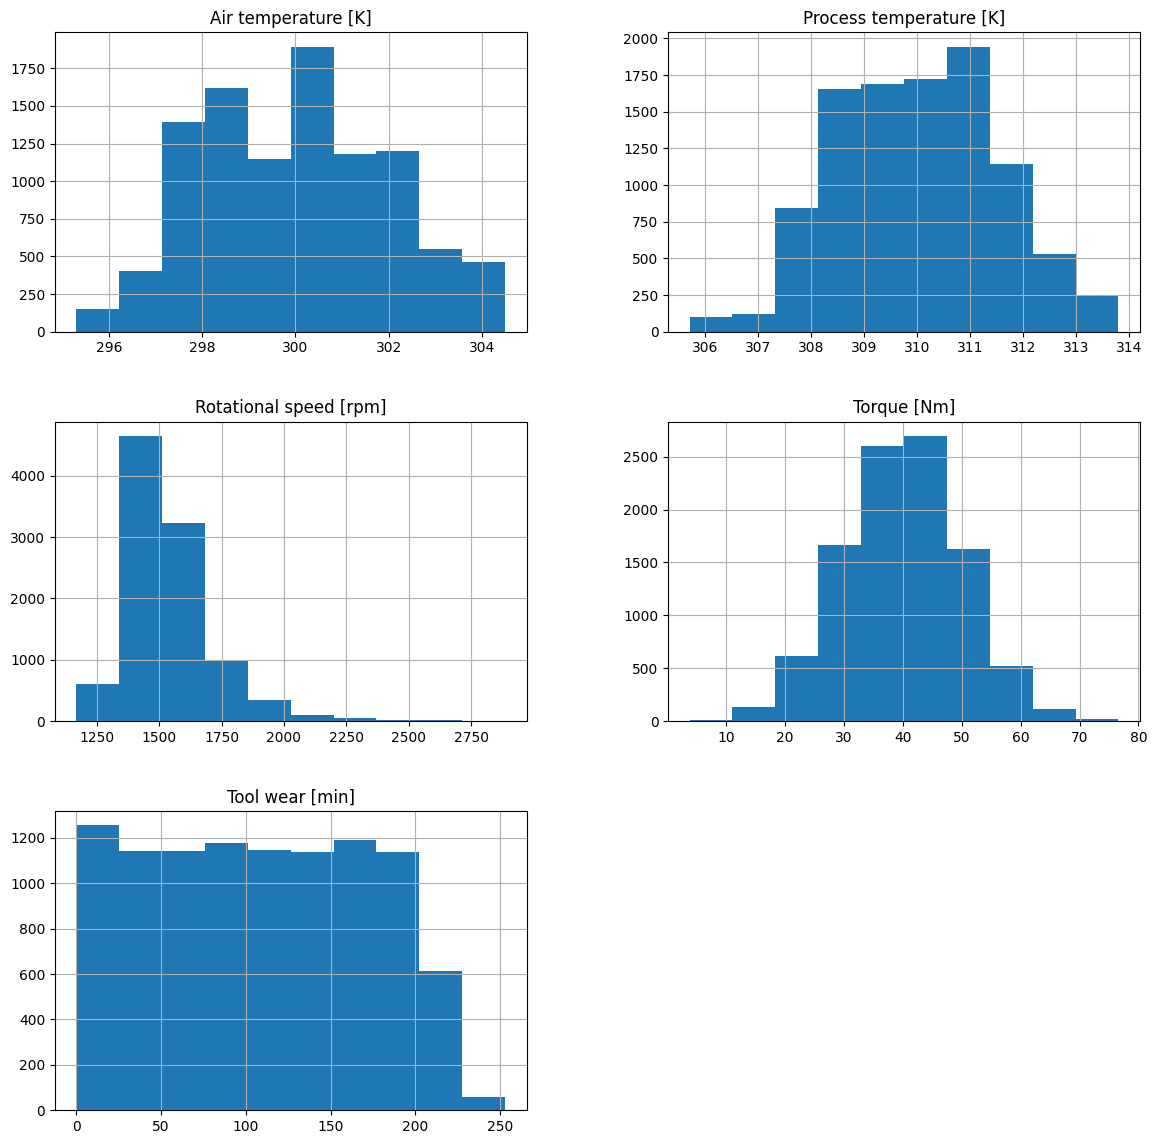

In [ ]:
df.hist(figsize=(14, 14))

In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


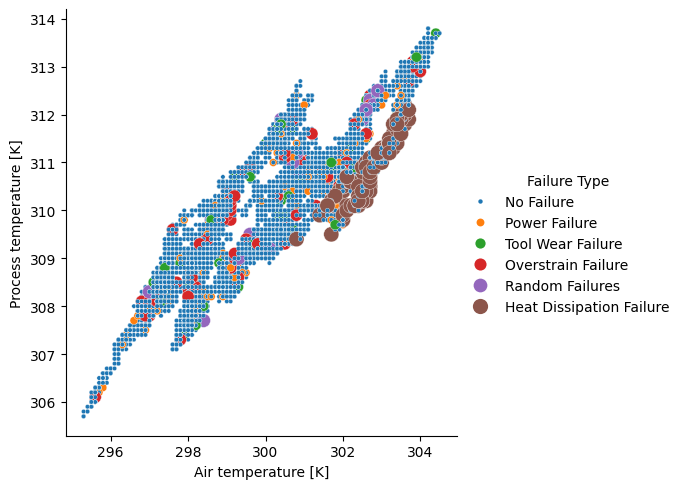

In [ ]:
_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type",size="Failure Type", sizes=(120, 10),data=df)

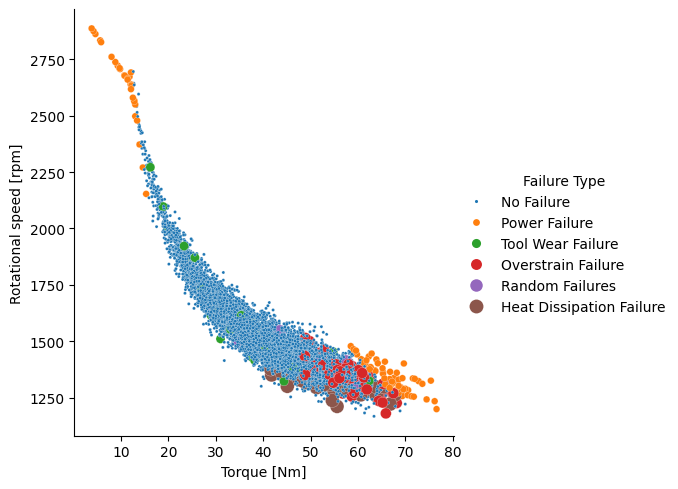

In [ ]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",size="Failure Type", sizes=(100, 5),data=df)

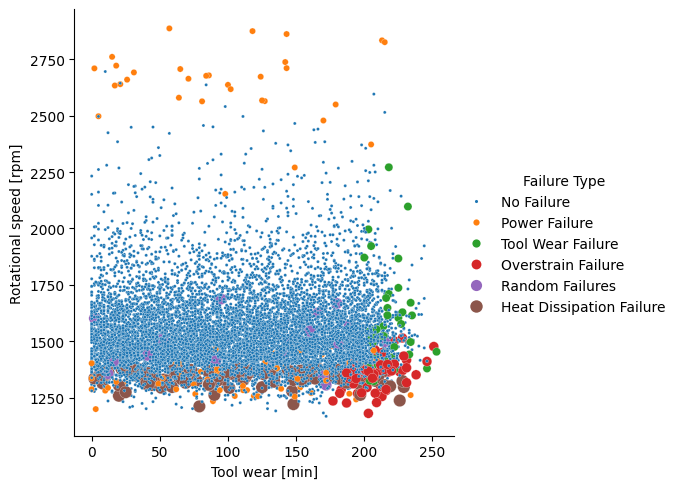

In [ ]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df)

In [ ]:
df["Failure Type"].replace({"No Failure": 0,"Heat Dissipation Failure": 1,"Power Failure": 2,"Overstrain Failure": 3,"Tool Wear Failure": 4,"Random Failures": 5},inplace=True)

In [ ]:
col_name=df.columns.to_list()

In [ ]:
predictive_columns = col_name[0:6]
X = df[predictive_columns]
y = df["Failure Type"]

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=None)
for train_index,test_index in skf.split(X,y):
    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    train_0, train_1 = len(y1_train[y1_train==0]), len(y1_train[y1_train==1])
    test_0, test_1 = len(y1_test[y1_test==0]), len(y1_test[y1_test==1])
    print('train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

train: 0=7721, 1=90, Test: 0=1931, 1=22
train: 0=7721, 1=90, Test: 0=1931, 1=22
train: 0=7722, 1=90, Test: 0=1930, 1=22
train: 0=7722, 1=89, Test: 0=1930, 1=23
train: 0=7722, 1=89, Test: 0=1930, 1=23


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=40, test_size=0.33, stratify=y)

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
X1_res, y1_res = smote.fit_resample(X_train,y_train)

In [ ]:
X1_res.shape

(38786, 6)

In [ ]:
X1_res

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,297.500000,308.700000,1371,46.500000,121,0
1,297.400000,308.600000,1452,41.200000,197,0
2,296.400000,307.300000,2077,19.100000,80,0
3,300.400000,309.300000,1413,50.300000,101,0
4,297.400000,308.100000,1348,57.400000,66,0
...,...,...,...,...,...,...
38781,302.567982,312.035964,1437,42.908492,201,5
38782,302.766184,312.183092,1507,36.246384,79,5
38783,299.733107,309.612309,1567,35.541596,183,5
38784,302.463023,311.872267,1308,59.649157,168,5


In [ ]:
y1_res.shape

(38786,)

In [ ]:
df_x = pd.DataFrame(X1_res)

In [ ]:
print(df_x.columns)

some_threshold = 290

df_x["Category"] = 0
df_x.loc[df_x.iloc[:, 0] > some_threshold, "Category"] = 1
df_x.loc[df_x.iloc[:, 0] <= some_threshold, "Category"] = 2

df_x["Category"].replace({0:"H",1:"L",2:"M"}, inplace=True)
print(df_x.head())

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type', 'Category'],
      dtype='object')
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                297.5                    308.7                    1371   
1                297.4                    308.6                    1452   
2                296.4                    307.3                    2077   
3                300.4                    309.3                    1413   
4                297.4                    308.1                    1348   

   Torque [Nm]  Tool wear [min]  Failure Type Category  
0         46.5              121             0        L  
1         41.2              197             0        L  
2         19.1               80             0        L  
3         50.3              101             0        L  
4         57.4               66             0        L  


In [ ]:
df_y = pd.DataFrame(y1_res)

In [ ]:
df_y["Failure Type"].replace({0:"No Failure",1:"Heat Dissipation Failure",2:"Power Failure",3:"Overstrain Failure",4:"Tool Wear Failure",5:"Random Failures"},inplace=True)


In [ ]:
df1 = pd.concat([df_x,df_y], axis=1)

In [ ]:
print(y1_res.shape)
print(y1_res.ndim)

if y1_res.ndim > 1:
    y1_res = y1_res.flatten()

df_y = pd.DataFrame(y1_res)

df_y = df_y.reset_index(drop=True)
df_y.columns = ['Failure Type']

# Drop the 'Failure Type' column from df_x if it exists
if 'Failure Type' in df_x.columns:
    df_x = df_x.drop('Failure Type', axis=1)

df1 = pd.concat([df_x,df_y], axis=1)

df1['Failure Type'].value_counts()

(38786,)
1


Failure Type
3    6467
5    6467
4    6467
1    6464
2    6462
0    6459
Name: count, dtype: int64

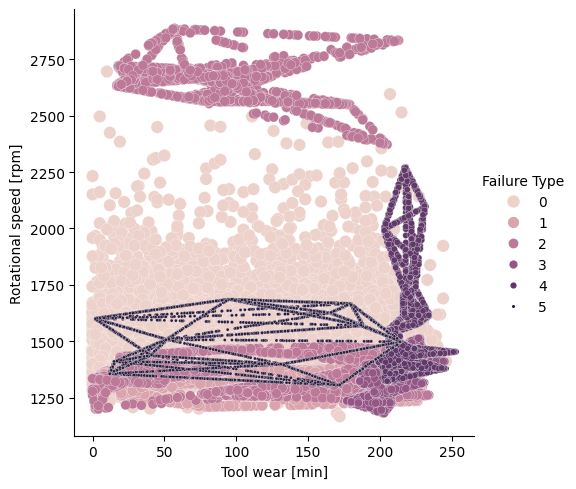

In [ ]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df1)

In [ ]:
X_test.shape

(3300, 6)

In [ ]:
y_test.shape

(3300,)

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))

to_log = ["Rotational speed [rpm]", "Tool wear [min]"]
to_scale = ["Air temperature [K]","Process temperature [K]", "Torque [Nm]"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale)])

In [ ]:
rfc = OutputCodeClassifier(RandomForestClassifier(), code_size=6, random_state=40)

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline, Pipeline  # Import Pipeline
from sklearn.compose import ColumnTransformer


pipeline = Pipeline(
    steps=[("preprocess", full),("base",rfc)])

In [ ]:
model_rfc = pipeline.fit(X1_res, y1_res)
y_pred_rfc = model_rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.39      0.59      0.47        37
           2       0.47      0.61      0.54        31
           3       0.67      0.77      0.71        26
           4       0.05      0.20      0.08        15
           5       0.00      0.00      0.00         6

    accuracy                           0.94      3300
   macro avg       0.43      0.52      0.46      3300
weighted avg       0.97      0.94      0.95      3300



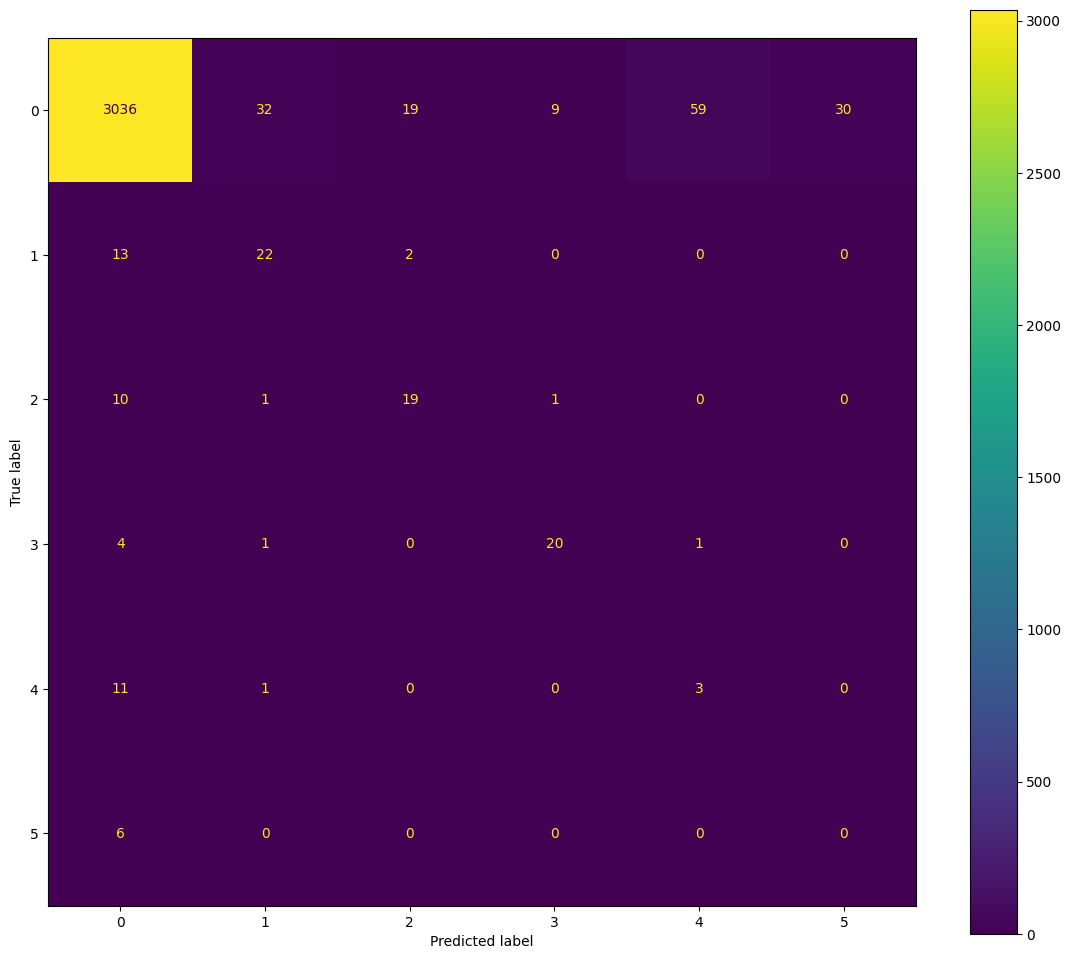

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


fig, ax = plt.subplots(figsize=(14, 12))
print(classification_report(y_test, y_pred_rfc))
# Create the matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.39      0.59      0.47        37
           2       0.47      0.61      0.54        31
           3       0.67      0.77      0.71        26
           4       0.05      0.20      0.08        15
           5       0.00      0.00      0.00         6

    accuracy                           0.94      3300
   macro avg       0.43      0.52      0.46      3300
weighted avg       0.97      0.94      0.95      3300



In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, matthews_corrcoef # Import accuracy_score and matthews_corrcoef


print("Accuracy Score: %.4f" %(accuracy_score(y_test,y_pred_rfc)))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test,y_pred_rfc)))

Accuracy Score: 0.9394
Matthews correlation coefficient: 0.4080


In [ ]:
!pip install lightgbm hummingbird-ml
from hummingbird.ml import convert
import lightgbm as lgb
import numpy as np

# Increased the number of samples to 2
X_train = np.array([3, 4]).reshape(-1, 1)
y_train = np.array([5, 6]) # Added another label

model = lgb.LGBMClassifier()

model.fit(X_train, y_train)

lgbm = convert(model, 'pytorch')


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[